In [ ]:
#import necessary packages
import pandas as pd
from os.path import exists
import openai
from config import Config
import time
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#set parameters
inputPath = 'inputData.csv'
ouputPath = 'mentions.csv'

In [ ]:
#check if inputpath file is there, otherwise stop the program with an error message
if exists(inputPath):
    dfInput = pd.read_csv(inputPath)
else: 
    print('input file found')
    print(0/0)

#check if inputData.csv exists if not create a new one


if exists(ouputPath):
    # read file into df
    dfOutput = pd.read_csv(ouputPath)
else:
    # create a df with the text and the source with row for id
    dfOutput = pd.DataFrame(columns=['text', 'source', 'time', 'mentions'])
    pass

In [ ]:
dfInput

In [ ]:
dfInput.head()
#throttle input for testing
#dfInput= dfInput.tail(5)


In [6]:
openai.api_key = Config.API_KEY

#create a dictionary for use in storing the data

prompt = """You are an assistant to a financial advisor. She tasked you with reading the text and assessing weahter it mentions a stock. Also consider if any of the stock might be impacted, if not directly mentioned
    If so provide a comma separated list of the stocks, but make sure, that you use the stock symbol, not the full name. If it does not simply respond 'no'"""


#loop through the texts
#for i in range(len(dfInput['text'])):
for row in dfInput.itertuples():

    #check if row. text is already in dfOutput
    if row.text in dfOutput['text'].values:
        print('already in dfOutput')
        continue

    response = openai.ChatCompletion.create(
        # = Config.API_KEY,
        model="gpt-4-0314",
        messages=[{"role": "system", "content": prompt},
                {"role": "user", "content": row.text}
        ])
    conclusion = response.choices[0].message.content.lower()

    #check if conclusion contains yes or no
    #print(conclusion)
    #if 'no' in conclusion:
    #    print('no stocks mentioned in ' + row.text)
    #else:
    try:

        dfOutput.loc[len(dfOutput)] = [row.text, row.source, row.time, conclusion]

    #catch any errors
    except Exception as e:
        stocks = []
        print('error ' + str(e))
        print (stocks)

    print ('entering sleep')
    time.sleep(10)


entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering sleep
entering s

In [7]:
analyzer = SentimentIntensityAnalyzer()


def getVader(text):
    vs = analyzer.polarity_scores(text)
    return vs

def getCompound(vader):
    return vader['compound']

dfOutput['vader'] = dfOutput['text'].apply(getVader)
dfOutput['compound'] = dfOutput['vader'].apply(getCompound)


#for row in dfOutput.itertuples():
    
#    print(getVader(row.text))

In [8]:
dfOutput

,text,source,time,mentions,vader,compound
0,In this edition of StockCharts TV's The Final ...,stockcharts,2023-11-07 10:01:35.688719,qqq,"{'neg': 0.014, 'neu': 0.933, 'pos': 0.053, 'co...",0.6597
1,In this week's edition of The DecisionPoint Tr...,stockcharts,2023-11-07 10:01:35.688719,no,"{'neg': 0.0, 'neu': 0.978, 'pos': 0.022, 'comp...",0.3931
2,The traditional year-end rally may have starte...,stockcharts,2023-11-07 10:01:35.688719,"qqq, msft, mdlz, xhb","{'neg': 0.045, 'neu': 0.854, 'pos': 0.101, 'co...",0.9985
3,Last week's sharp upward reversal in the bond ...,stockcharts,2023-11-07 10:01:35.688719,ief,"{'neg': 0.073, 'neu': 0.865, 'pos': 0.062, 'co...",-0.8364
4,"Trading isn't easy. It requires knowledge, ex...",stockcharts,2023-11-07 10:01:35.688719,"nvda, xlp, xlre, xlu, xlc, xlf, xlk","{'neg': 0.029, 'neu': 0.815, 'pos': 0.156, 'co...",0.9992
...,...,...,...,...,...,...
183,In this edition of StockCharts TV's The Final ...,stockcharts,2023-11-27 17:19:08.018580,tsla,"{'neg': 0.048, 'neu': 0.86, 'pos': 0.092, 'com...",0.7096
184,"Palantir Technologies (PLTR) was a ""talked-abo...",stockcharts,2023-11-27 17:19:08.019488,pltr,"{'neg': 0.009, 'neu': 0.941, 'pos': 0.049, 'co...",0.9469
185,"In the previous episode, TG explained that we ...",stockcharts,2023-11-27 17:19:08.020157,no,"{'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...",0.6542
186,Sample ReportBelow is our latest Weekly Market...,stockcharts,2023-11-27 17:19:08.020957,"iwm, mdy, xlre, xlu, xly, xlb, xle, xlv, gps, ...","{'neg': 0.047, 'neu': 0.829, 'pos': 0.124, 'co...",0.9998


In [9]:
#create dfPivot
dfPivot = pd.DataFrame(columns=['mention', 'source', 'time', 'compound'])

In [10]:
for row in dfOutput.itertuples():
    for mention in row.mentions.split(','):
        if mention.strip() == 'no':
            continue

        dfPivot.loc[len(dfPivot)] = [mention.strip(), row.source, row.time, row.compound]
        dfPivot = dfPivot.drop_duplicates(subset=['mention', 'time'], keep="last")
        dfPivot = dfPivot.reset_index(drop=True)

In [11]:
dfPivot

,mention,source,time,compound
0,msft,stockcharts,2023-11-07 10:01:35.688719,0.9985
1,mdlz,stockcharts,2023-11-07 10:01:35.688719,0.9985
2,xhb,stockcharts,2023-11-07 10:01:35.688719,0.9985
3,ief,stockcharts,2023-11-07 10:01:35.688719,-0.8364
4,nvda,stockcharts,2023-11-07 10:01:35.688719,0.9992
...,...,...,...,...
208,xhb,stockcharts,2023-11-27 17:19:08.021948,0.9994
209,qqq,stockcharts,2023-11-27 17:19:08.021948,0.9994
210,msft,stockcharts,2023-11-27 17:19:08.021948,0.9994
211,botz,stockcharts,2023-11-27 17:19:08.021948,0.9994


In [12]:
pathToFile = 'pivot.csv'
dfPivot.to_csv(pathToFile, index=False)

<Axes: >

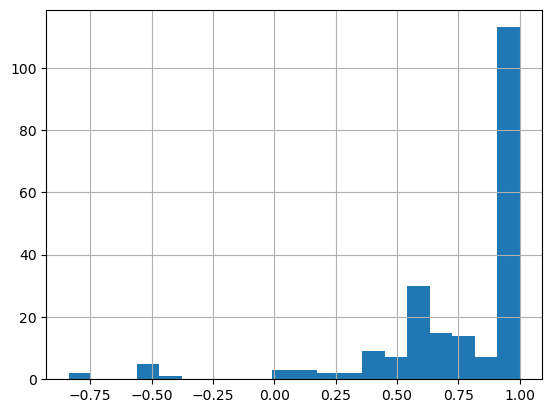

In [17]:
#data analysis
#show the spread of compound on a histogram
import matplotlib.pyplot as plt
import numpy as np

dfPivot['compound'].hist(bins=20)


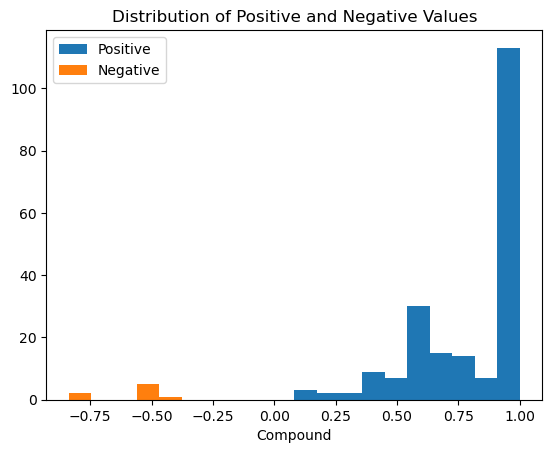

In [16]:
positive_values = dfPivot[dfPivot['compound'] > 0]
negative_values = dfPivot[dfPivot['compound'] < 0]

plt.hist([positive_values['compound'], negative_values['compound']], bins=20, stacked=True, label=['Positive', 'Negative'])
plt.xlabel('Compound')
plt.title('Distribution of Positive and Negative Values')
plt.legend()
plt.show()
